# Data Analysis Project: Bike Sharing Dataset from Capital Bikeshare

---

- Nama: Pratama Wibi
- Email: pratamawibi24@gmail.com
- ID Dicoding: pratwib


## 1. Project Introduction

---


### 1.1 Background

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic,
environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into
a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
events in the city could be detected via monitoring these data.


### 1.2 Dataset

Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is
publicly available in http://capitalbikeshare.com/system-data.

We aggregated the data on two hourly and daily basis and then
extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com.


### 1.3 Dataset Characteristics

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit :
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered


## 2. Defining Business Questions

---

1. How is the number comparison between casual and registered user types?
2. During which season do users of bike-sharing services reach their peak?
3. How has the bike-sharing user trend been in the last 2 years?
4. What is the usage pattern of bike-sharing services based on day of the week?
5. Does weather affect the usage of bike-sharing services?
6. Is there a correlation between temperature conditions and the number of users of bike-sharing services?


## 3. Import the Libraries

---

Import the required library for data analysis process.


In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 4. Data Wrangling

---


### 4.1 Gathering Data

Load the dataset. Here we have 2 datasets, namely **hour.csv** and **day.csv**, load both of them.


#### Load day.csv


In [104]:
day_df = pd.read_csv("dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Load hour.csv


In [105]:
hour_df = pd.read_csv("dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


After reviewing, it appears that both datasets have very similiar data. The only difference is `hr` column in **hour.csv**. Since there are no business questions regarding the hourly usage of bike-sharing services, it is sufficient to use only the **day.csv** dataset for efficiency.


### 4.2 Assessing Data

In assesing a dataset, there are several things that need to be checked, including:

#### Check for data types


In [106]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


There are several things that need to be corrected:

- Some column names are a bit difficult to read, change them to make more readable. For example, `yr` -> `year`.
- Convert data type of `dteday` column from integer to datetime.
- The values in the `season` and `weathersit` columns are still integer, change them to string for better understanding. For example, 1 -> Spring.
- The `yr`, `month`, and `weekday` values is also in integer format, change the values to the actual `datetime` names. For example, 0 -> 2011.


#### Check for missing values


In [107]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

It seems that there are no missing values in the dataset. That's great.


#### Check for duplicated data


In [108]:
print("Duplicated data: ", day_df.duplicated().sum())

Duplicated data:  0


It seems that there are no duplicated data in this dataset. That's nice.


#### Check data statistical summary


In [109]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


So far, there is no anomalies in the dataset summary.

However, according to the dataset characteristics, the variables `temp`, `atemp`, `hum`, and `windspeed` are normalized. In order to obtain a better understanding of the real-life conditions, adjust these values to their pre-normalized form.


### 4.3 Cleaning Data

Performing data cleaning based on the findings from the data assessment process.

#### Change several column names


In [110]:
day_df.rename(
    columns={
        "dteday": "dateday",
        "yr": "year",
        "mnth": "month",
        "weathersit": "weather",
        "cnt": "count",
    },
    inplace=True,
)

day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Convert `dateday` data type


In [111]:
day_df["dateday"] = pd.to_datetime(day_df["dateday"])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dateday     731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   year        731 non-null    int64         
 4   month       731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weather     731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  count       731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Change the values of `season` and `weather` columns


In [112]:
day_df["season"] = day_df["season"].map(
    {
        1: "Spring",
        2: "Summer",
        3: "Fall",
        4: "Winter",
    }
)

day_df["weather"] = day_df["weather"].map(
    {
        1: "Clear",
        2: "Cloudy",
        3: "Light Rain",
        4: "Heavy Rain",
    }
)

day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,0,1,0,6,0,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,1,0,0,0,Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,1,0,1,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,1,0,2,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,1,0,3,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Change the values of `weekday`, `month` and `year` columns


In [113]:
day_df["weekday"] = day_df["dateday"].dt.day_name()

day_df["month"] = day_df["dateday"].dt.month_name()

day_df["year"] = day_df["dateday"].dt.year

day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,January,0,Saturday,0,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,0,Sunday,0,Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,0,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,0,Tuesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,0,Wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Change the values of `temp`, `atemp`, `hum` and `windspeed` to pre-normalized form


In [114]:
day_df["temp"] = day_df["temp"] * 41
day_df["atemp"] = day_df["atemp"] * 50
day_df["hum"] = day_df["hum"] * 100
day_df["windspeed"] = day_df["windspeed"] * 67

day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,January,0,Saturday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Spring,2011,January,0,Sunday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Spring,2011,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Spring,2011,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Spring,2011,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Drop the unused columns


In [115]:
day_df.drop(labels="instant", axis=1, inplace=True)

day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,2011-01-01,Spring,2011,January,0,Saturday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2011-01-02,Spring,2011,January,0,Sunday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2011-01-03,Spring,2011,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2011-01-04,Spring,2011,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2011-01-05,Spring,2011,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [116]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dateday     731 non-null    datetime64[ns]
 1   season      731 non-null    object        
 2   year        731 non-null    int32         
 3   month       731 non-null    object        
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    object        
 6   workingday  731 non-null    int64         
 7   weather     731 non-null    object        
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  count       731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(5), object(4)
memory usa

#### Save the cleaned dataset

After the data cleaning process is completed, save the cleaned dataset for future use.


In [117]:
day_df.to_csv("cleaned_day.csv", index=False)

## 5. Exploratory Data Analysis

---

Time to explore the cleaned dataset to gain insights in order to address busineess questions.

#### Check again the data statistical summary


In [118]:
day_df.describe(include="all")

,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
count,731,731,731.000000,731,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,NaN,12,NaN,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,NaN,January,NaN,Saturday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,NaN,62,NaN,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,2011.500684,NaN,0.028728,NaN,0.683995,NaN,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,NaN,0.000000,NaN,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,2011.000000,NaN,0.000000,NaN,0.000000,NaN,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,2012.000000,NaN,0.000000,NaN,1.000000,NaN,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,2012.000000,NaN,0.000000,NaN,1.000000,NaN,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,2012.000000,NaN,1.000000,NaN,1.000000,NaN,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


There is no anomalies in this dataset summary.


#### Bike-sharing users by `type`


In [119]:
day_df[["casual", "registered"]].describe().style.format("{:.0f}")

,casual,registered
count,731,731
mean,848,3656
std,687,1560
min,2,20
25%,316,2497
50%,713,3662
75%,1096,4776
max,3410,6946


In [120]:
users_by_type = day_df[["casual", "registered"]].sum()

users_by_type

casual         620017
registered    2672662
dtype: int64

From each statistic, it appears that the number of **registered users** is roughly **4x higher** that **casual users**.


#### Bike-sharing users by `year`


In [121]:
users_by_year = day_df.groupby(by="year").agg(
    {
        "casual": "sum",
        "registered": "sum",
        "count": "sum",
    }
)

users_by_year.style.format("{:.0f}")

,casual,registered,count
year,,,
2011,247252,995851,1243103
2012,372765,1676811,2049576


It appears that number of bike-sharing users increased significantly from 2011 to 2012, almost **doubling**.


#### Bike-sharing users by `month`


In [122]:
users_by_month = day_df.groupby(by="month").agg(
    {
        "casual": "sum",
        "registered": "sum",
        "count": "sum",
    }
)

users_by_month.style.format("{:.0f}")
users_by_month.sort_values(by=("count"), ascending=False)

,casual,registered,count
month,,,
August,72039,279155,351194
June,73906,272436,346342
September,70323,275668,345991
July,78157,266791,344948
May,75285,256401,331686
October,59760,262592,322352
April,60802,208292,269094
November,36603,218228,254831
March,44444,184476,228920


It appears that number of bike-sharing users reaches its peak in **August**, while at the **beginning of the year**, it tends to be at its lowest.


#### Bike-sharing users by `day`


In [123]:
users_by_weekday = day_df.groupby(by="weekday").agg(
    {
        "casual": "sum",
        "registered": "sum",
        "count": "sum",
    }
)

users_by_weekday.style.format("{:.0f}")
users_by_weekday.sort_values(by=("count"), ascending=False)

,casual,registered,count
weekday,,,
Friday,78238,409552,487790
Thursday,61460,423935,485395
Saturday,153852,323955,477807
Wednesday,57319,415729,473048
Tuesday,57843,411266,469109
Monday,70784,384719,455503
Sunday,140521,303506,444027


In [124]:
users_by_holiday = day_df.groupby(by="holiday").agg(
    {
        "casual": "sum",
        "registered": "sum",
        "count": "sum",
    }
)

users_by_holiday.style.format("{:.0f}")

,casual,registered,count
holiday,,,
0,597658,2616586,3214244
1,22359,56076,78435


In [125]:
users_by_workingday = day_df.groupby(by="workingday").agg(
    {
        "casual": "sum",
        "registered": "sum",
        "count": "sum",
    }
)

users_by_workingday.style.format("{:.0f}")

,casual,registered,count
workingday,,,
0,316732,683537,1000269
1,303285,1989125,2292410


- It appears that number of bike-sharing users is **consistently high on weekdays**, with the peak occuring in Friday.
- Meanwhile, **during the weekend, the user count tends to be lower**, especially on holidays where it expreriences a significant drop.
- However, there is an exception for `casual` users, as their numbers quite **high during the weekend**.


#### Bike-sharing users by `season`


In [126]:
users_by_season = day_df.groupby(by="season").agg(
    {
        "casual": "sum",
        "registered": "sum",
        "count": "sum",
    }
)

users_by_season.style.format("{:.0f}")
users_by_season.sort_values(by=("count"), ascending=False)

,casual,registered,count
season,,,
Fall,226091,835038,1061129
Summer,203522,715067,918589
Winter,129782,711831,841613
Spring,60622,410726,471348


It appears that number of bike-sharing users is **high in the fall** season and **very low in the spring** season.


#### Bike-sharing users by `weather`


In [127]:
users_by_weather = day_df.groupby(by="weather").agg(
    {
        "casual": "sum",
        "registered": "sum",
        "count": "sum",
    }
)

users_by_weather.style.format("{:.0f}")
users_by_weather.sort_values(by=("count"), ascending=False)

,casual,registered,count
weather,,,
Clear,446346,1811606,2257952
Cloudy,169776,827082,996858
Light Rain,3895,33974,37869


It appears that number of bike-sharing users is **very high during the clear** weather, and **its indeed zero during heavy rain** conditions.


#### Correlation between `count` of Bike-sharing users vs. `temp`, `atemp`, `hum`, and `windspeed`


In [128]:
selected_columns = ["count", "temp", "atemp", "hum", "windspeed"]
day_df[selected_columns].corr(numeric_only=True)

,count,temp,atemp,hum,windspeed
count,1.000000,0.627494,0.631066,-0.100659,-0.234545
temp,0.627494,1.000000,0.991702,0.126963,-0.157944
atemp,0.631066,0.991702,1.000000,0.139988,-0.183643
hum,-0.100659,0.126963,0.139988,1.000000,-0.248489
windspeed,-0.234545,-0.157944,-0.183643,-0.248489,1.000000


- It appears that the `count` of bike-sharing users has a **positive moderate correlation** vs. `temp` and `atemp`. This implies that the number of bike-sharing users increases as the temperature rises.
- Meanwhile, there is **a bit of negatif correlation** at between `hum` and `windspeed` vs. `count` of bike-sharing users.


#### Correlation and correlation heat map


In [129]:
day_df.corr(numeric_only=True)

,year,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,count
year,1.000000,0.007954,-0.002013,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
holiday,0.007954,1.000000,-0.253023,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
workingday,-0.002013,-0.253023,1.000000,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
temp,0.047604,-0.028556,0.052660,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.046106,-0.032507,0.052182,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,-0.110651,-0.015937,0.024327,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.011817,0.006292,-0.018796,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual,0.248546,0.054274,-0.518044,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804
registered,0.594248,-0.108745,0.303907,0.540012,0.544192,-0.091089,-0.217449,0.395282,1.000000,0.945517
count,0.566710,-0.068348,0.061156,0.627494,0.631066,-0.100659,-0.234545,0.672804,0.945517,1.000000


<Axes: >

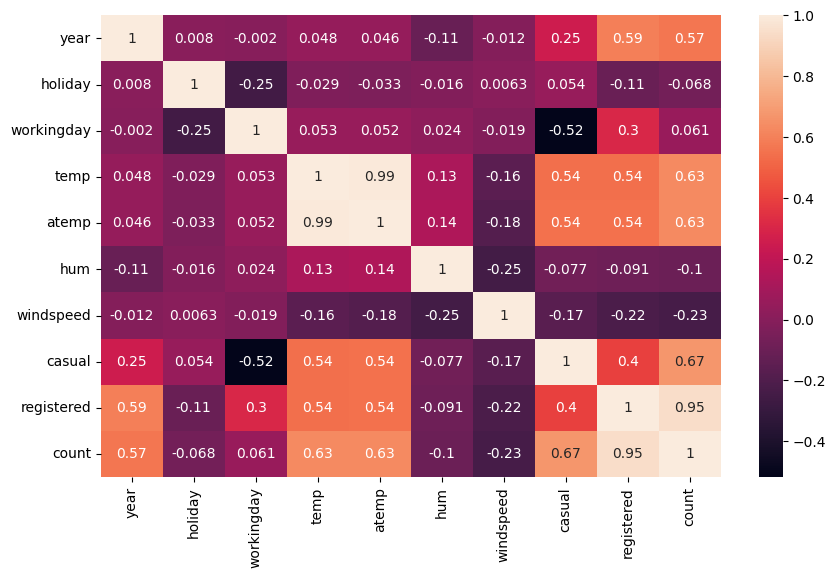

In [130]:
plt.figure(figsize=(10, 6))


sns.heatmap(day_df.corr(numeric_only=True), annot=True)

## 6. Visualization & Explanatory Data Analysis

---

In this section, we will address the business questions and visualize the answers.


### 6.1 How is the number comparison between casual and registered user types?


In [131]:
users_by_type = users_by_type.reset_index()
users_by_type = users_by_type.rename(columns={"index": "type", 0: "total"})

users_by_type

,type,total
0,casual,620017
1,registered,2672662


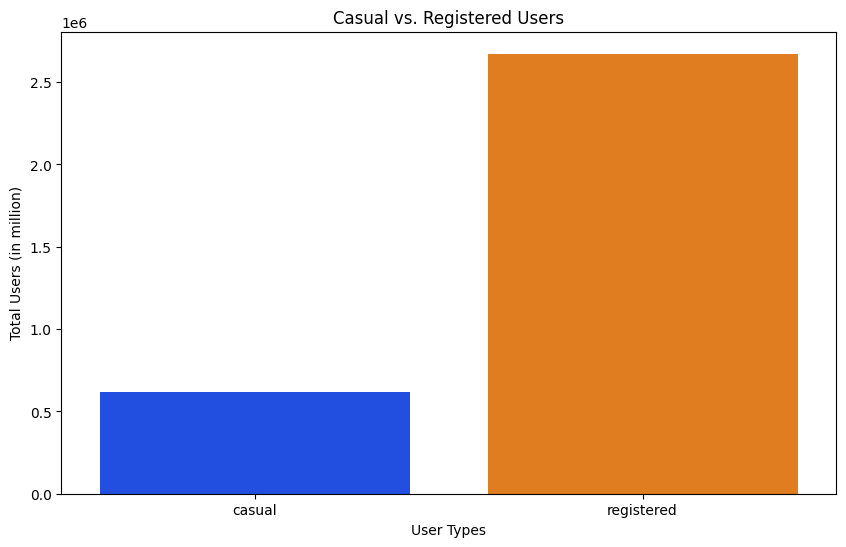

In [132]:
plt.figure(figsize=(10, 6))

sns.barplot(
    x="type",
    y="total",
    hue="type",
    data=users_by_type,
    palette="bright",
)
plt.title("Casual vs. Registered Users")
plt.xlabel("User Types")
plt.ylabel("Total Users (in million)")
plt.show()

Based on the above visualtization, its appear that the comparison of total bike-sharing users with `registered` type is **significantly higher** compared to `casual` type. The difference is almost **4x higher** over the last 2 years.


### 6.2 During which season do users of bike-sharing services reach their peak?


In [133]:
users_by_season = users_by_season.sort_values(by="count", ascending=False)
users_by_season = users_by_season.reset_index()

users_by_season

,season,casual,registered,count
0,Fall,226091,835038,1061129
1,Summer,203522,715067,918589
2,Winter,129782,711831,841613
3,Spring,60622,410726,471348


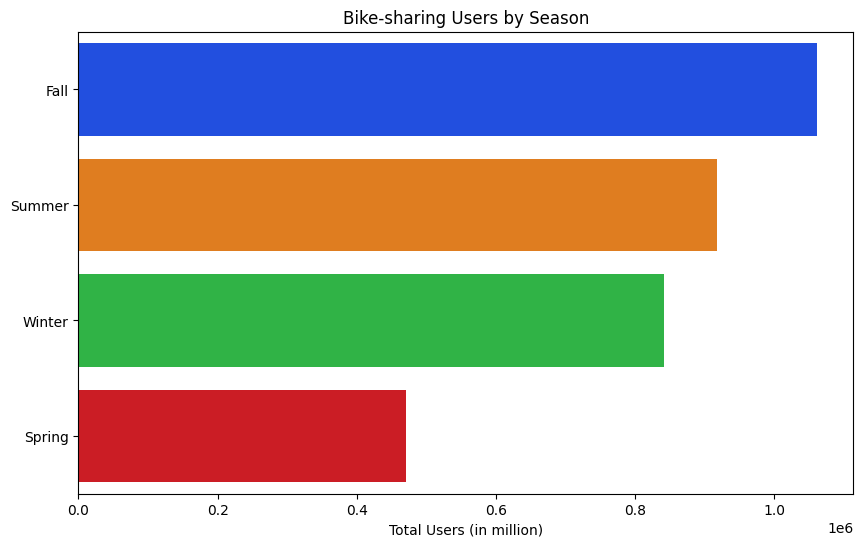

In [134]:
plt.figure(figsize=(10, 6))

plt
sns.barplot(
    x="count",
    y="season",
    hue="season",
    data=users_by_season,
    palette="bright",
)
plt.title("Bike-sharing Users by Season")
plt.xlabel("Total Users (in million)")
plt.ylabel(None)
plt.show()

In [135]:
users_by_season_unpivoted = pd.melt(
    users_by_season,
    id_vars=["season"],
    value_vars=["casual", "registered"],
    var_name="type",
)

users_by_season_unpivoted

,season,type,value
0,Fall,casual,226091
1,Summer,casual,203522
2,Winter,casual,129782
3,Spring,casual,60622
4,Fall,registered,835038
5,Summer,registered,715067
6,Winter,registered,711831
7,Spring,registered,410726


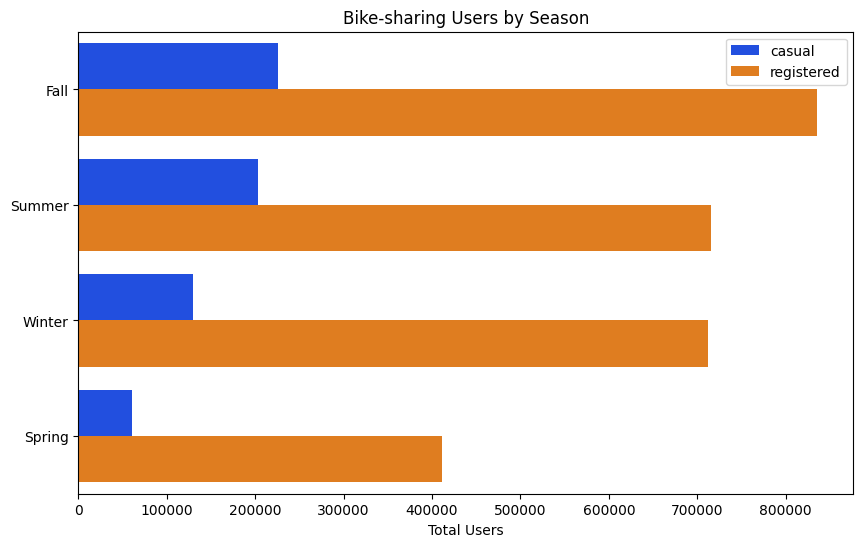

In [136]:
plt.figure(figsize=(10, 6))

sns.barplot(
    x="value",
    y="season",
    hue="type",
    data=users_by_season_unpivoted,
    palette="bright",
)
plt.title("Bike-sharing Users by Season")
plt.xlabel("Total Users")
plt.ylabel(None)
plt.legend(loc="upper right")
plt.show()

- The bike-sharing service experiences its **peak during fall** `season`, followed closely by summer and winter, with the **lowest usage in spring** `season`.
- When considering user types, there is no significant difference. All seasons follow a similliar pattern on their total user counts.


### 6.3 How has the bike-sharing user trend been in the last 2 years?


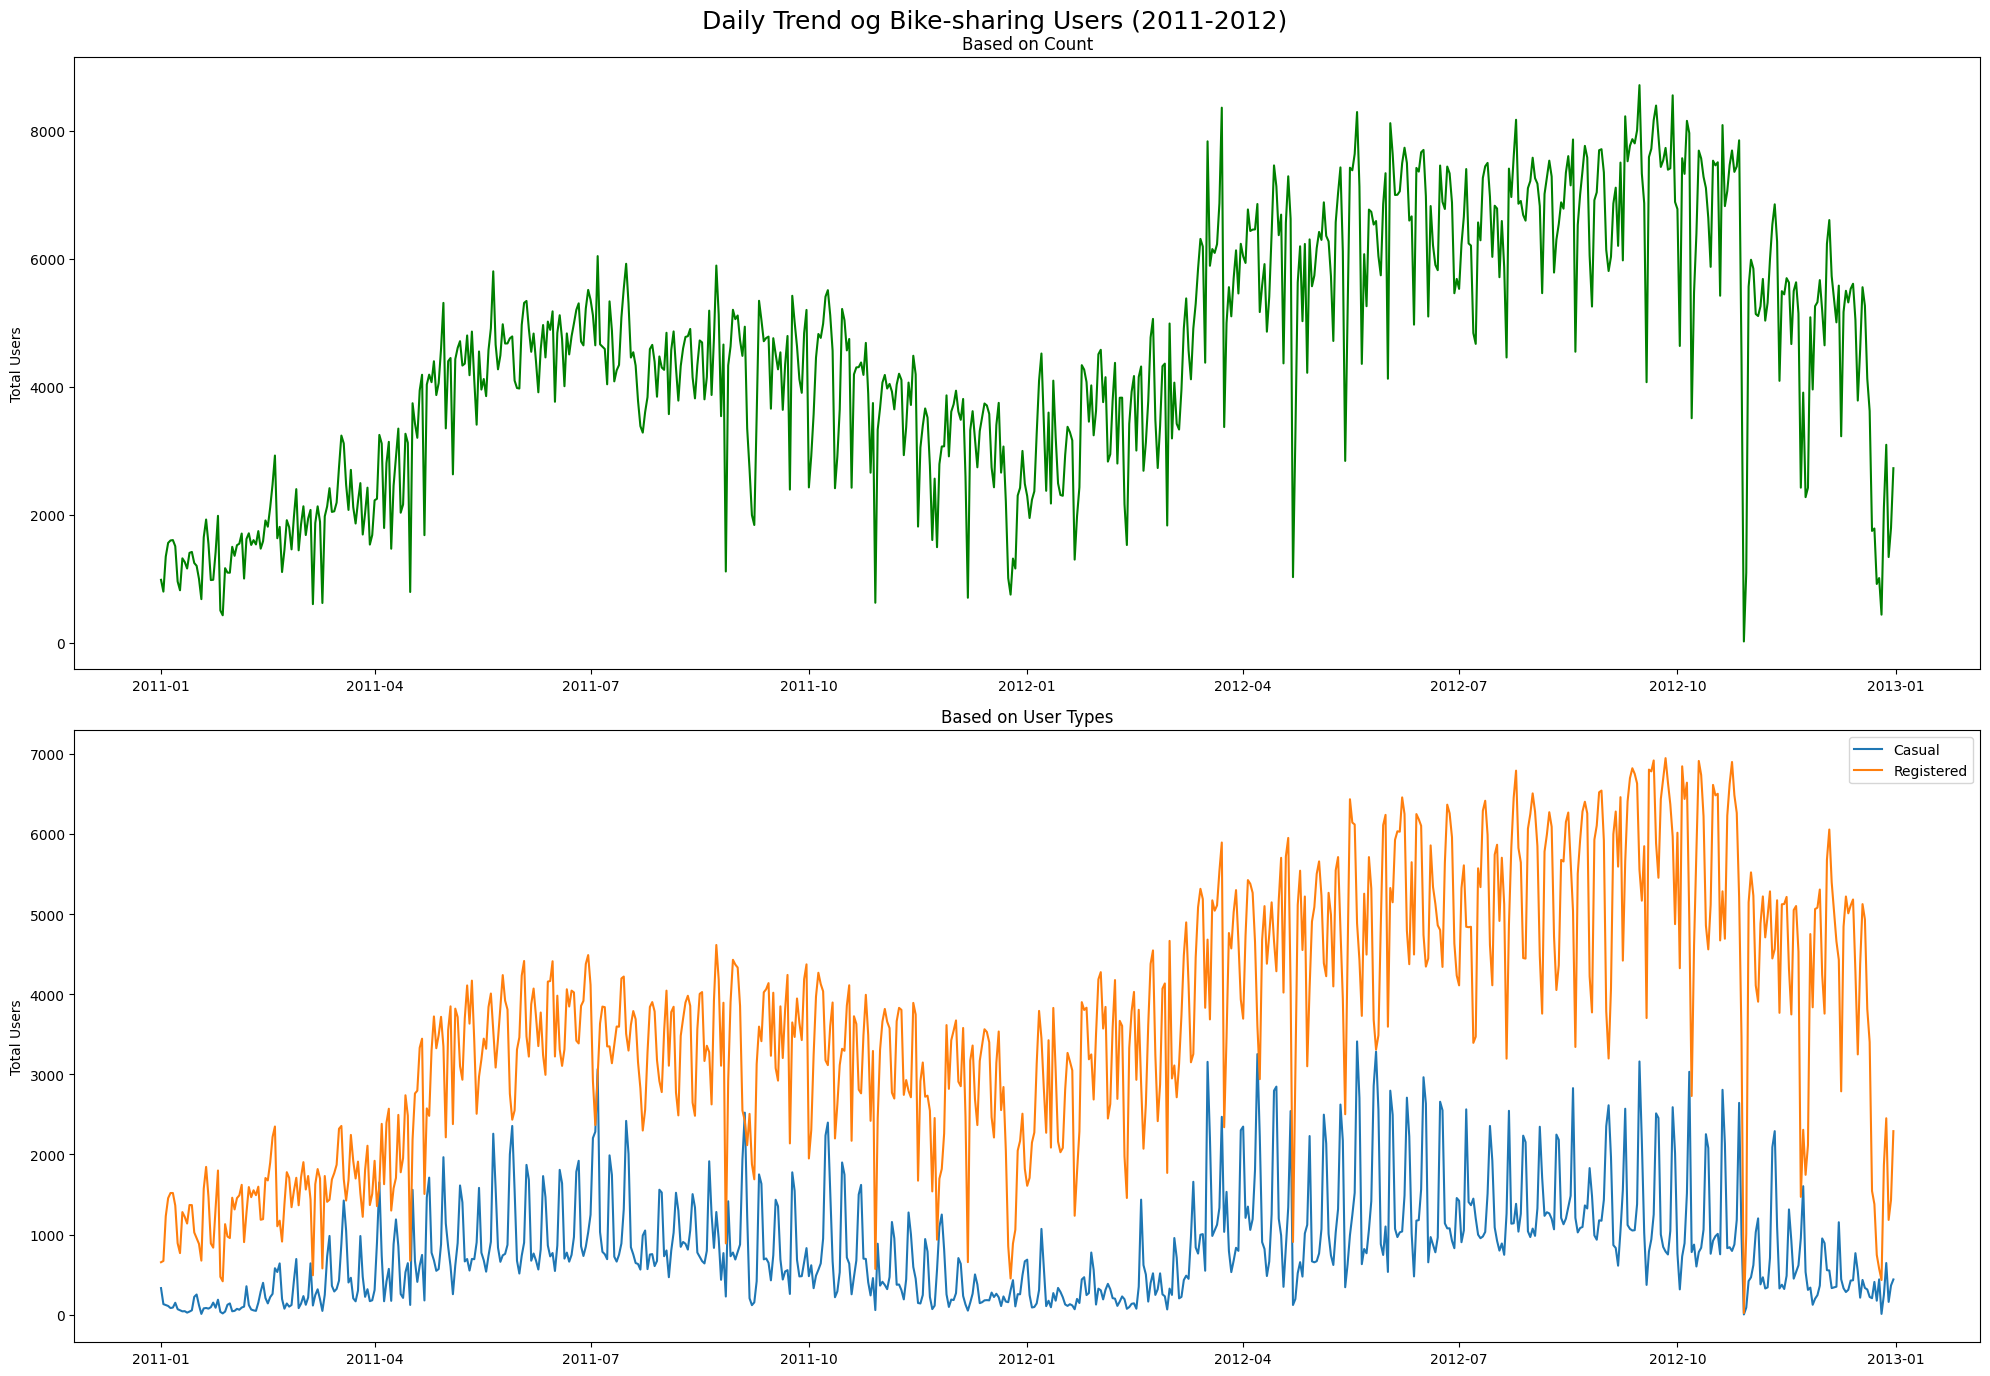

In [137]:
plt.figure(figsize=(20, 14))
plt.suptitle("Daily Trend og Bike-sharing Users (2011-2012)", fontsize=18)

plt.subplot(2, 1, 1)
sns.lineplot(
    x="dateday",
    y="count",
    data=day_df,
    color="green",
)
plt.title("Based on Count")
plt.xlabel(None)
plt.ylabel("Total Users")

plt.subplot(2, 1, 2)
sns.lineplot(
    x="dateday",
    y="casual",
    data=day_df,
    label="Casual",
)
sns.lineplot(
    x="dateday",
    y="registered",
    data=day_df,
    label="Registered",
)
plt.title("Based on User Types")
plt.xlabel(None)
plt.ylabel("Total Users")

plt.tight_layout()
plt.show()

In [138]:
monthly_users = day_df.resample(rule="M", on="dateday").agg(
    {
        "casual": "sum",
        "registered": "sum",
        "count": "sum",
    }
)
monthly_users.index = monthly_users.index.strftime("%b-%y")

monthly_users.head()

,casual,registered,count
dateday,,,
Jan-11,3073,35116,38189
Feb-11,6242,41973,48215
Mar-11,12826,51219,64045
Apr-11,22346,72524,94870
May-11,31050,104771,135821


In [139]:
monthly_users = monthly_users.reset_index()
monthly_users = monthly_users.rename(columns={"dateday": "month-year"})

monthly_users.head()

,month-year,casual,registered,count
0,Jan-11,3073,35116,38189
1,Feb-11,6242,41973,48215
2,Mar-11,12826,51219,64045
3,Apr-11,22346,72524,94870
4,May-11,31050,104771,135821


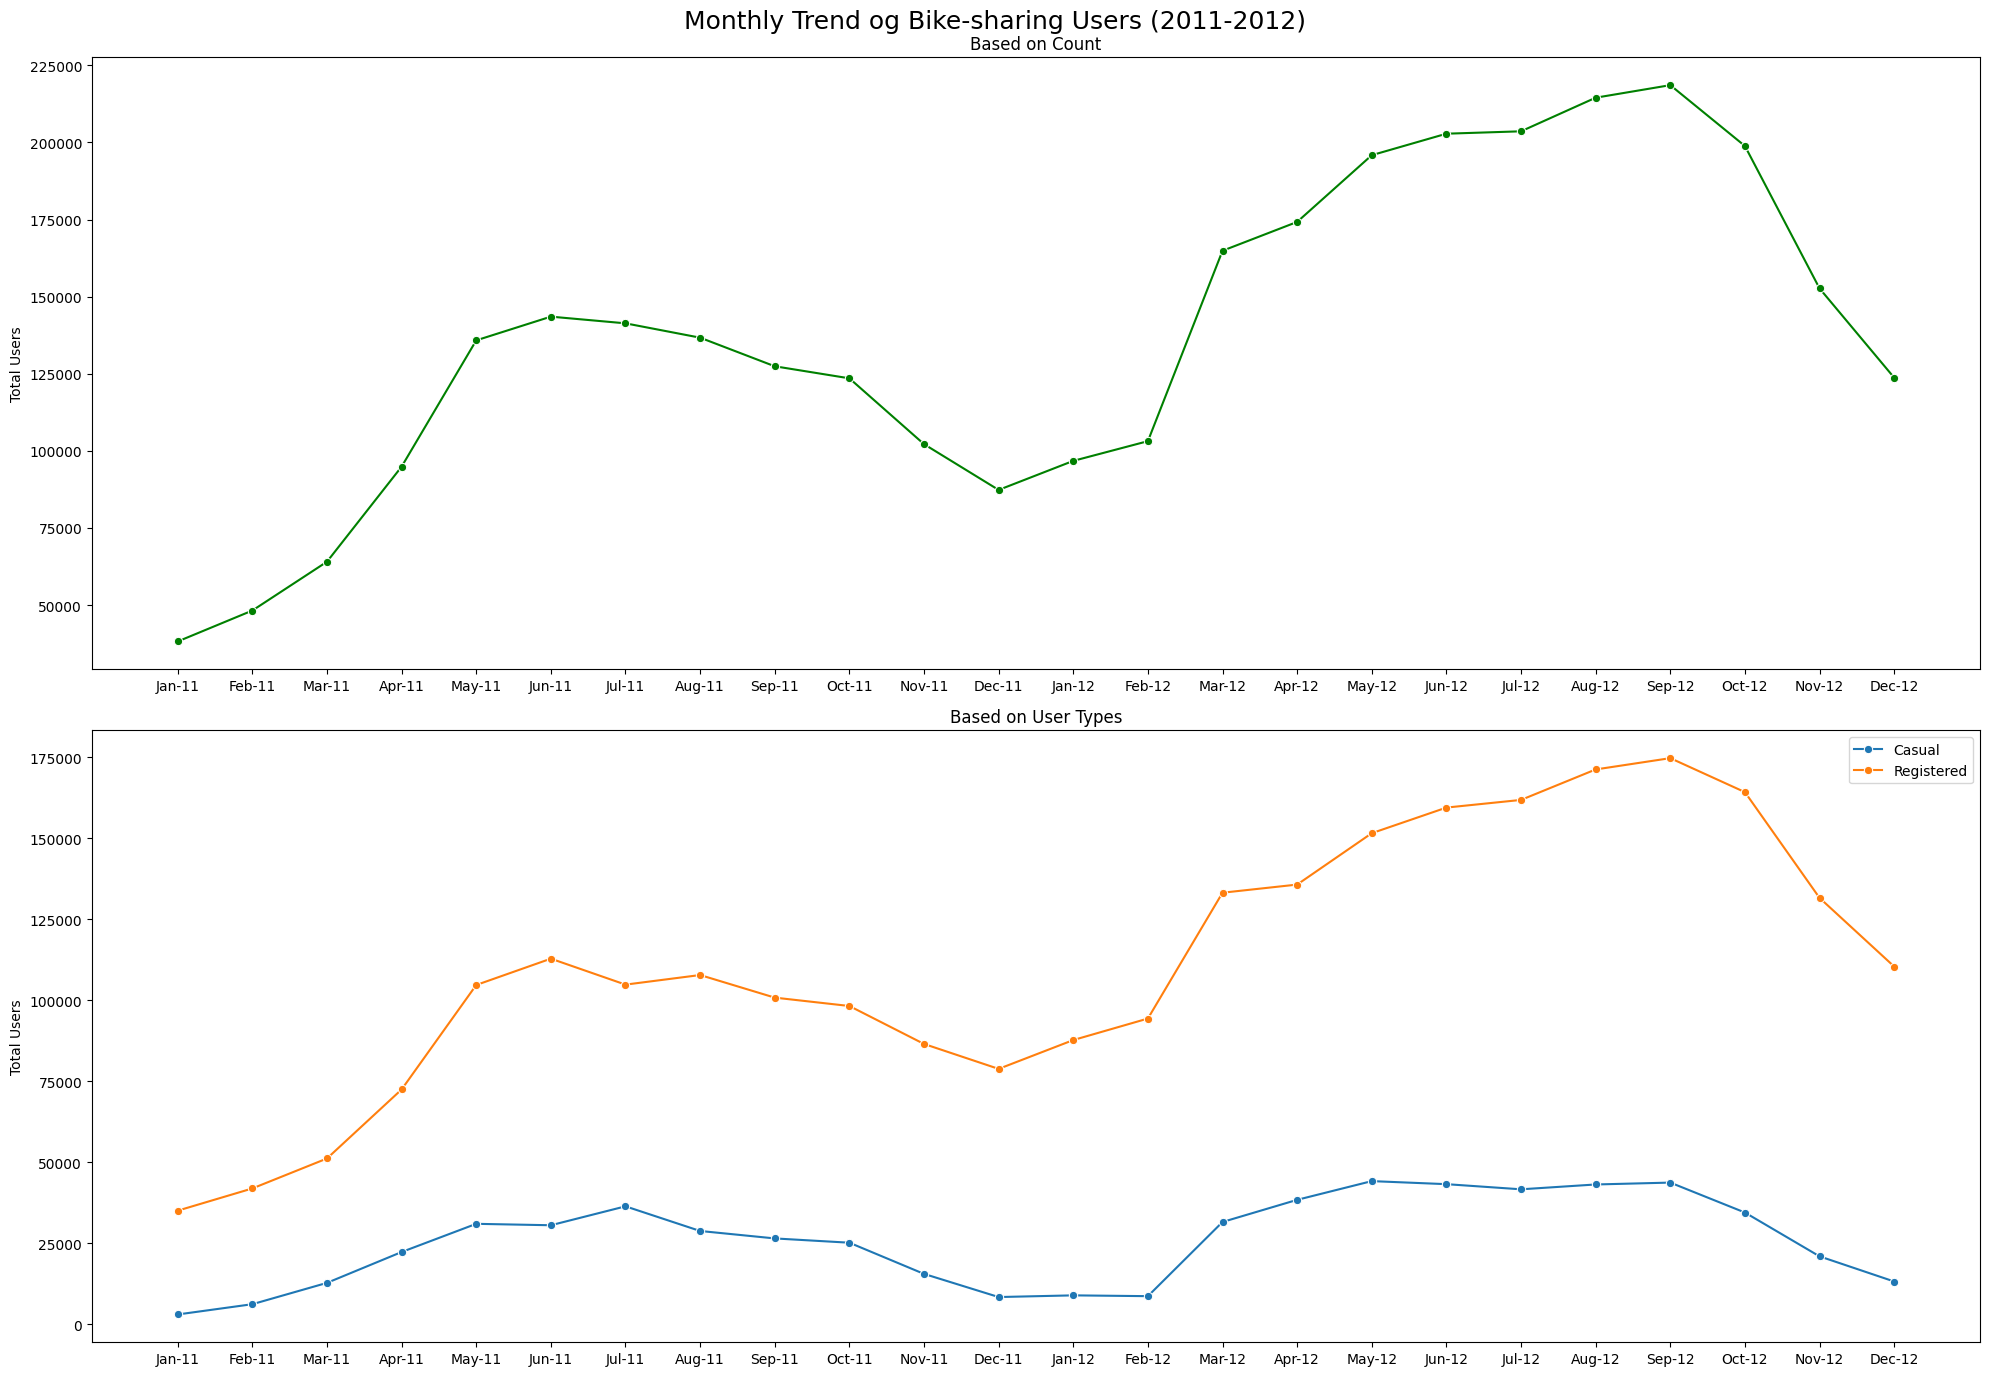

In [140]:
plt.figure(figsize=(20, 14))
plt.suptitle("Monthly Trend og Bike-sharing Users (2011-2012)", fontsize=18)

plt.subplot(2, 1, 1)
sns.lineplot(
    x="month-year",
    y="count",
    data=monthly_users,
    marker="o",
    color="green",
)
plt.title("Based on Count")
plt.xlabel(None)
plt.ylabel("Total Users")

plt.subplot(2, 1, 2)
sns.lineplot(
    x="month-year",
    y="casual",
    data=monthly_users,
    marker="o",
    label="Casual",
)
sns.lineplot(
    x="month-year",
    y="registered",
    data=monthly_users,
    marker="o",
    label="Registered",
)
plt.title("Based on User Types")
plt.xlabel(None)
plt.ylabel("Total Users")

plt.tight_layout()
plt.show()

- The number of bike-sharing users experienced an **increase in 2012 compared to 2011**, particularly among `registered` users.
- Each year, the number of bike-sharing users starts at low point in Q1, reaches its peak in Q3, and decreases again in Q4.
- Although both types of users showed an increase, `registered` users significantly outperformed `casual` users in terms of quantity in the last 2 years.


### 6.4 What is the usage pattern of bike-sharing services based on day of the week?


In [141]:
users_by_weekday = users_by_weekday.reset_index()

users_by_weekday

,weekday,casual,registered,count
0,Friday,78238,409552,487790
1,Monday,70784,384719,455503
2,Saturday,153852,323955,477807
3,Sunday,140521,303506,444027
4,Thursday,61460,423935,485395
5,Tuesday,57843,411266,469109
6,Wednesday,57319,415729,473048


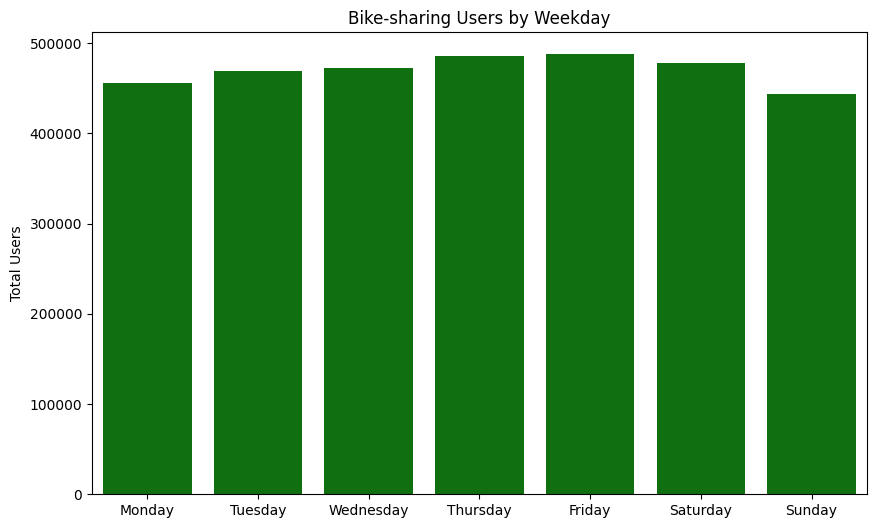

In [142]:
day_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]

plt.figure(figsize=(10, 6))

sns.barplot(
    x="weekday",
    y="count",
    data=users_by_weekday,
    order=day_order,
    color="green",
)
plt.title("Bike-sharing Users by Weekday")
plt.xlabel(None)
plt.ylabel("Total Users")
plt.show()

In [143]:
users_by_weekday_unpivoted = pd.melt(
    users_by_weekday,
    id_vars=["weekday"],
    value_vars=["casual", "registered"],
    var_name="type",
)

users_by_weekday_unpivoted

,weekday,type,value
0,Friday,casual,78238
1,Monday,casual,70784
2,Saturday,casual,153852
3,Sunday,casual,140521
4,Thursday,casual,61460
5,Tuesday,casual,57843
6,Wednesday,casual,57319
7,Friday,registered,409552
8,Monday,registered,384719
9,Saturday,registered,323955


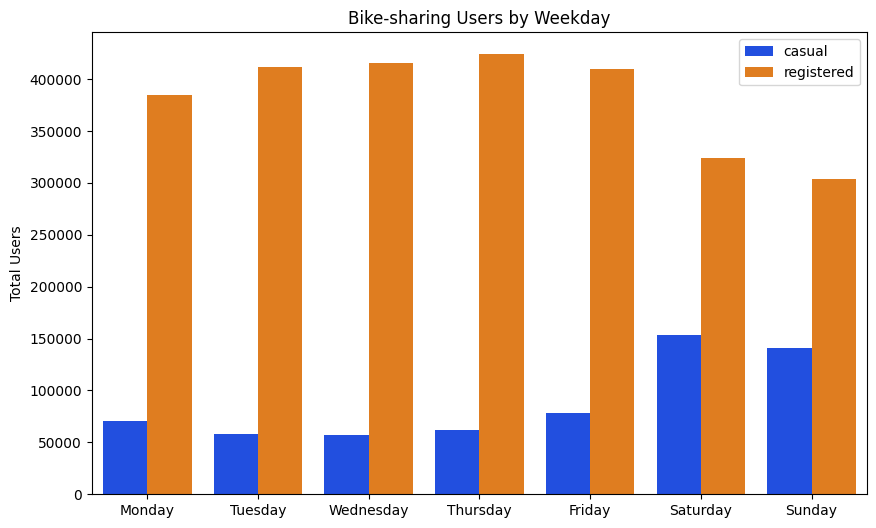

In [144]:
plt.figure(figsize=(10, 6))

sns.barplot(
    x="weekday",
    y="value",
    hue="type",
    data=users_by_weekday_unpivoted,
    order=day_order,
    palette="bright",
)
plt.title("Bike-sharing Users by Weekday")
plt.xlabel(None)
plt.ylabel("Total Users")
plt.legend(loc="upper right")
plt.show()

In [145]:
users_by_workingday = users_by_workingday.reset_index()

users_by_workingday

,workingday,casual,registered,count
0,0,316732,683537,1000269
1,1,303285,1989125,2292410


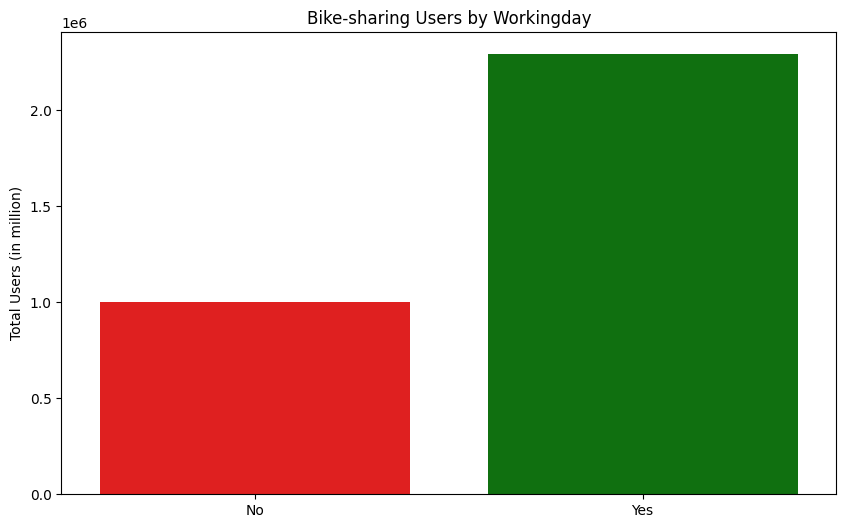

In [146]:
plt.figure(figsize=(10, 6))

plt
sns.barplot(
    x="workingday",
    y="count",
    hue="workingday",
    legend=False,
    data=users_by_workingday,
    palette=["red", "green"],
)
plt.title("Bike-sharing Users by Workingday")
plt.xlabel(None)
plt.ylabel("Total Users (in million)")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.show()

In [147]:
users_by_holiday = users_by_holiday.reset_index()

users_by_holiday

,holiday,casual,registered,count
0,0,597658,2616586,3214244
1,1,22359,56076,78435


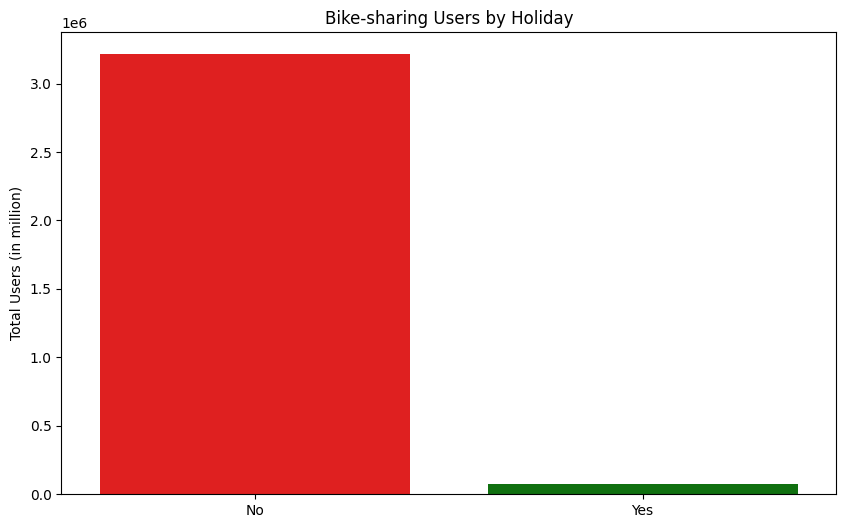

In [148]:
plt.figure(figsize=(10, 6))

plt
sns.barplot(
    x="holiday",
    y="count",
    hue="holiday",
    legend=False,
    data=users_by_holiday,
    palette=["red", "green"],
)
plt.title("Bike-sharing Users by Holiday")
plt.xlabel(None)
plt.ylabel("Total Users (in million)")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.show()

- The visualization of bike-sharing users by `weekday` shows a **constant value** for each day.
- However, when looking at by user types, `registered` users tend to **higher on weekdays**, while `casual` users tend to be **higer on weekends**.
- Its supported by the visualization of bike-sharing users by `workingday`, which indicates that on weekdays, the number od users is **significantly higher**.
- Meanwhile, during `holiday`, bike-sharing users experience a **drastic decrease**.


### 6.5 Does weather affect the usage of bike-sharing services?


In [149]:
users_by_weather = users_by_weather.reset_index()

users_by_weather

,weather,casual,registered,count
0,Clear,446346,1811606,2257952
1,Cloudy,169776,827082,996858
2,Light Rain,3895,33974,37869


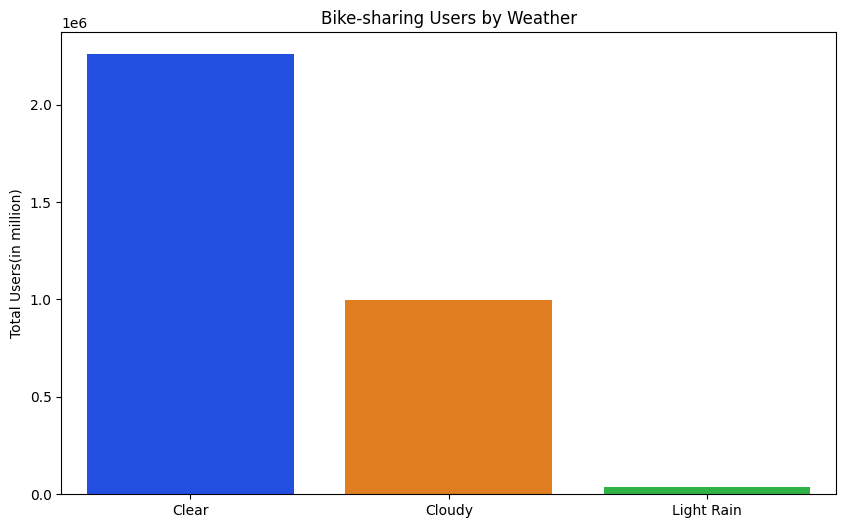

In [150]:
plt.figure(figsize=(10, 6))

sns.barplot(
    x="weather",
    y="count",
    hue="weather",
    data=users_by_weather,
    palette="bright",
)
plt.title("Bike-sharing Users by Weather")
plt.xlabel(None)
plt.ylabel("Total Users(in million)")
plt.show()

- Using only barplot, its appears that `weather` **definitely influences** the number of bike-sharing users. About **3/4** of bike-sharing users prefer using bicycles during clear `weather`.
- Even during heavy rain `weather`, there are **no bike-sharing users at all or zero**.


### 6.6 Is there a correlation between temperature conditions and the number of users of bike-sharing services?


In [151]:
selected_columns = ["count", "temp", "atemp", "hum", "windspeed"]
temp_count_etc = day_df[selected_columns]

temp_count_etc.corr(numeric_only=True)

,count,temp,atemp,hum,windspeed
count,1.000000,0.627494,0.631066,-0.100659,-0.234545
temp,0.627494,1.000000,0.991702,0.126963,-0.157944
atemp,0.631066,0.991702,1.000000,0.139988,-0.183643
hum,-0.100659,0.126963,0.139988,1.000000,-0.248489
windspeed,-0.234545,-0.157944,-0.183643,-0.248489,1.000000


<Axes: >

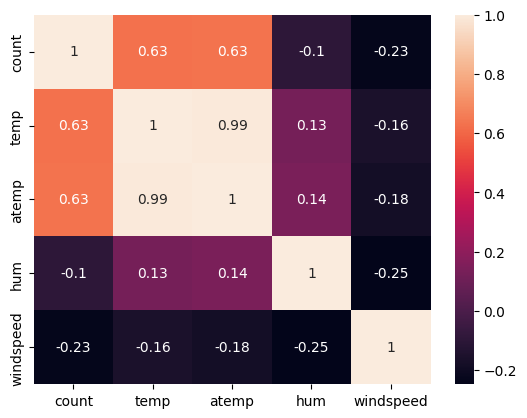

In [152]:
sns.heatmap(temp_count_etc.corr(numeric_only=True), annot=True)

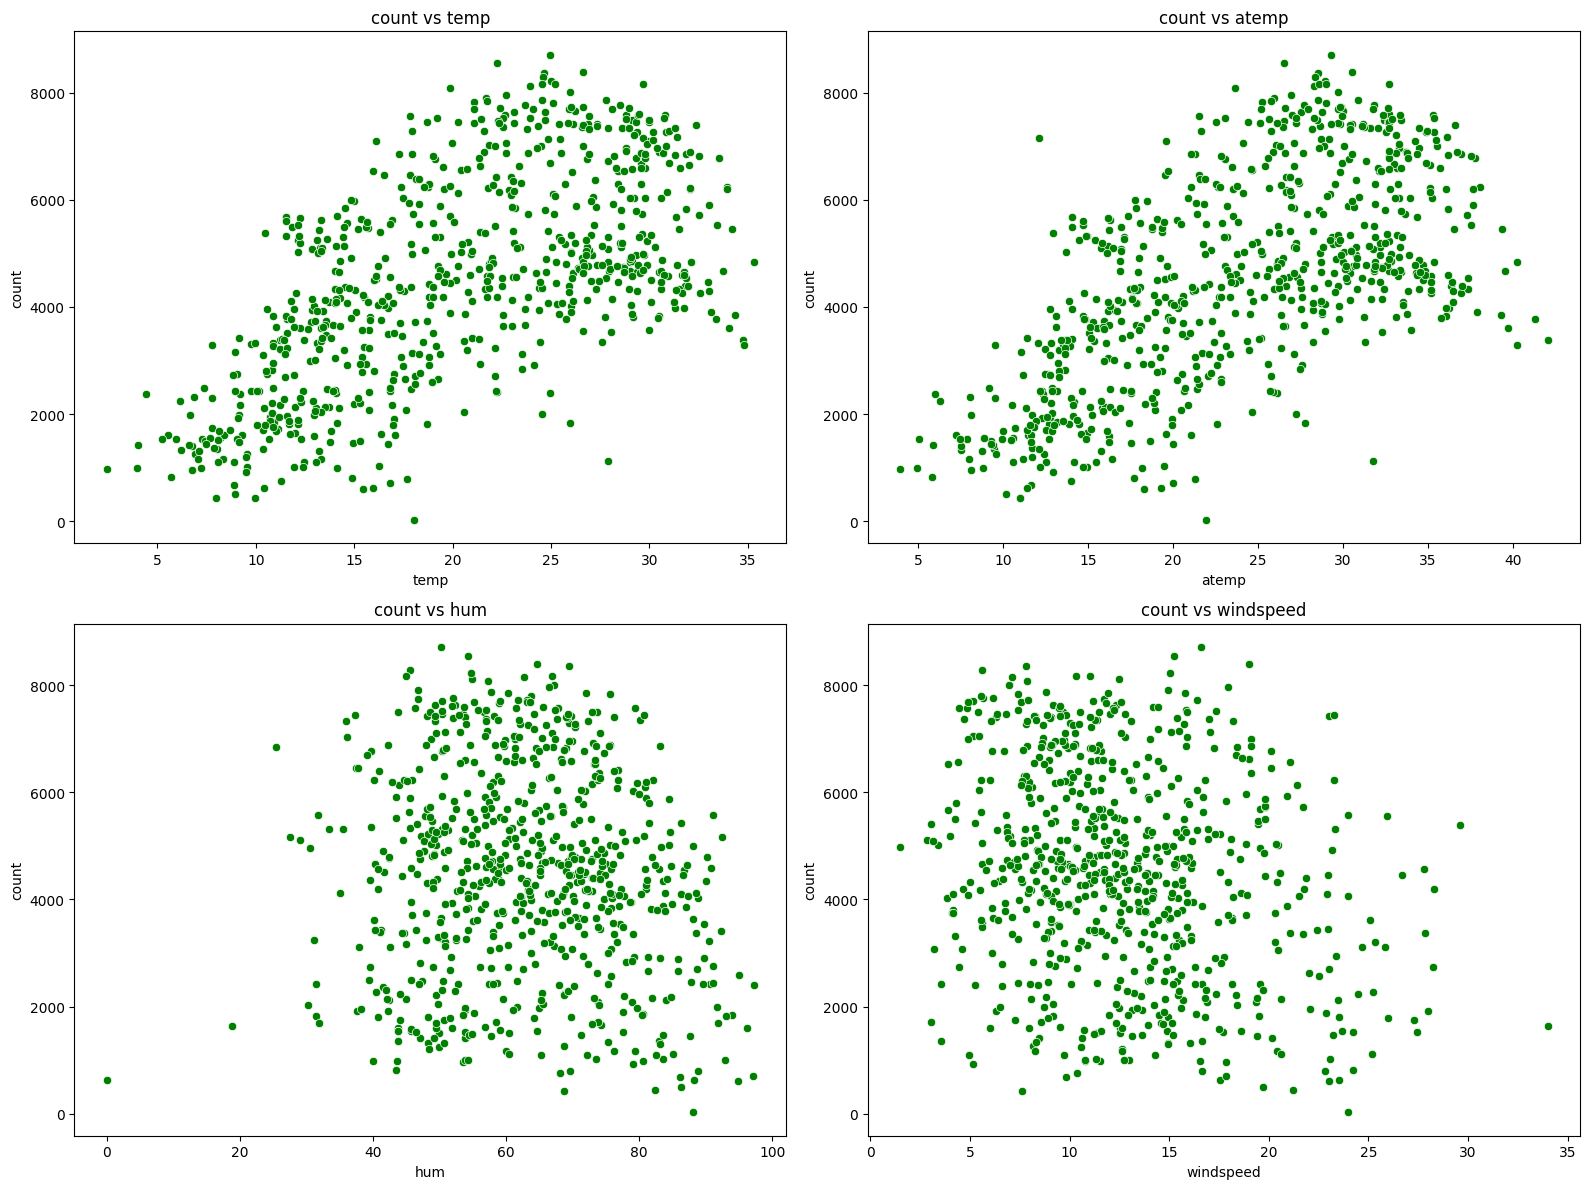

In [153]:
selected_columns = ["temp", "atemp", "hum", "windspeed"]

fig, axs = plt.subplots(2, 2, figsize=(16, 12))

for i, col in enumerate(selected_columns):
    sns.scatterplot(
        x=col,
        y="count",
        data=day_df,
        ax=axs[i // 2, i % 2],
        color="green",
    )
    axs[i // 2, i % 2].set_title(f"count vs {col}")

plt.tight_layout()
plt.show()

Based on the heatmap and scatterplot observations:

- It appears that the `count` of bike-sharing users has a **positive moderate correlation** vs. `temp` and `atemp`. This implies that the number of bike-sharing users increases as the temperature rises.
- Meanwhile, there is **a bit of negatif correlation** at between `hum` and `windspeed` vs. `count` of bike-sharing users.


## 7. Conclusion

---


### 7.1 How is the number comparison between casual and registered user types?


The number of `registered` bike-sharing users, totaling 2.6 million, is **notably higher** compared to `casual` users, which amount to 600,000. This indicates a substantial difference, with `registered` users being approximately 4x more numerous than `casual` users.


### 7.2 During which season do users of bike-sharing services reach their peak?


The bike-sharing service **reaches its peak during fall** `season`, with 1 million users. Summer and winter closely follow, while the usage is comparatively lower in spring `season`, with around 470,000 users. Interestingly, when examining user types, there is no notable difference in the seasonal patterns, as all seasons demonstrate a similar total user count trend.


### 7.3 How has the bike-sharing user trend been in the last 2 years?


In the last 2 years (2011-2012), there was an **overall growth** in the number of bike-sharing users. This increase was particularly pronounced among `registered` users. The annual trend for both user types consistently involves a low point in Q1, a peak in Q3, and a decrease in Q4. Significantly, `registered` users outperformed casual users in terms of quantity, showcasing a substantial increase for both user categories.

### 7.4 What is the usage pattern of bike-sharing services based on day of the week?


The usage pattern of bike-sharing services based on the day of the week reveals a **consistent overall value around 400,000** users daily. However, a closer look by user types shows that `registered` users tend to be **higher on weekdays**, while `casual` users show **higher usage on weekends**. The trend aligns with the distinction observed in the visualization of bike-sharing users on working days, where the **number in total significantly increases** to 2.3 million. On the contrary, during holidays, there is a **drastic decrease** in bike-sharing users, reaching only 78,000.

### 7.5 Does weather affect the usage of bike-sharing services?


The barplot analysis indicates that weather has a **significant impact** on the usage og bike-sharing services. Approximately 3/4 of users, totalling 2.3 million, prefer biking in clear `weather`. Interestingly, during heavy rain, there are no bike-sharing users at all, suggesting a notable influence of `weather` conditions on the choice to use bike-sharing services.

### 7.6 Is there a correlation between temperature conditions and the number of users of bike-sharing services?


The observations from the heatmap and scatterplot suggest a correlation between temperature conditions and `count` of bike-sharing users. There is a **positive moderate correlation**, around 0.6 points, with both `temp` and `atemp`, indicating that `count` of bike-sharing users **tends to increase** as temperature rises. Additionally, there is a **slight negative correlation**, about -0.1 point for `hum` and -0.23 points for `windspeed`, implying that as humidity and wind speed increase, there is a **small decrease** in `count` of bike-sharing users.
